##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [152]:
#%pip install pandas 
#%pip install matplotlib
#%pip install statsmodels
#%pip install seaborn
#%pip install scikit-learn
#%pip install mlxtend
#%pip install numpy
#%pip install xgboost
#%pip install catboost
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [153]:
# Import packages
import catboost as cb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import zscore
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

## 1. Processing Data

#### 1.A Percentage of Missing Values in Each Column

In [154]:
df1 = pd.read_csv(filepath)
df1.isna().sum() / len(df1) * 100

LATITUDE                                 0.411212
LONGITUDE                                0.411212
AccountID                                0.000000
Company                                  0.000000
SIC Code                                 0.000000
Industry                                 0.000000
8-Digit SIC Code                         0.000000
8-Digit SIC Description                  0.000000
Year Found                               1.487218
Entity Type                              0.000000
Parent Company                           1.761360
Parent Country                           1.781920
Ownership Type                           0.000000
Company Description                      0.000000
Square Footage                         100.000000
Company Status (Active/Inactive)         0.000000
Employees (Single Site)                 42.502227
Employees (Domestic Ultimate Total)      0.270715
Employees (Global Ultimate Total)        9.505860
Sales (Domestic Ultimate Total USD)      0.000000


#### 1.B Correlation and Description

In [155]:
numerical_df = df1.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = numerical_df.corr()

# Change it to a DataFrame
corr_m = pd.DataFrame(corr_matrix)

corr_m

LATITUDE  LONGITUDE  SIC Code  \
LATITUDE                             1.000000  -0.048014 -0.086447   
LONGITUDE                           -0.048014   1.000000  0.027467   
SIC Code                            -0.086447   0.027467  1.000000   
8-Digit SIC Code                    -0.086741   0.027591  0.999772   
Year Found                          -0.023920  -0.008341  0.195683   
Square Footage                            NaN        NaN       NaN   
Employees (Single Site)              0.001218  -0.006147 -0.050296   
Employees (Domestic Ultimate Total)  0.004256   0.013906 -0.022058   
Employees (Global Ultimate Total)   -0.010028   0.003871  0.001587   
Sales (Domestic Ultimate Total USD)  0.004602  -0.006884 -0.011493   
Sales (Global Ultimate Total USD)   -0.010685   0.008687 -0.014743   
Is Domestic Ultimate                -0.004247   0.001314  0.016096   
Is Global Ultimate                  -0.039308   0.009406  0.087371   

                                     8-Digit SIC Code  Year Found  \
LATITUDE                                    -0.086741   -0.023920   
LONGITUDE                                    0.027591   -0.008341   
SIC Code                                     0.999772    0.195683   
8-Digit SIC Code                             1.000000    0.195632   
Year Found                                   0.195632    1.000000   
Square Footage                                    NaN         NaN   
Employees (Single Site)                     -0.051988   -0.060472   
Employees (Domestic Ultimate Total)         -0.022178   -0.046540   
Employees (Global Ultimate Total)            0.001607   -0.025981   
Sales (Domestic Ultimate Total USD)         -0.011480    0.014523   
Sales (Global Ultimate Total USD)           -0.014717   -0.021591   
Is Domestic Ultimate                         0.015921    0.076785   
Is Global Ultimate                           0.087409    0.111644   

                                     Square Footage  Employees (Single Site)  \
LATITUDE                                        NaN                 0.001218   
LONGITUDE                                       NaN                -0.006147   
SIC Code                                        NaN                -0.050296   
8-Digit SIC Code                                NaN                -0.051988   
Year Found                                      NaN                -0.060472   
Square Footage                                  NaN                      NaN   
Employees (Single Site)                         NaN                 1.000000   
Employees (Domestic Ultimate Total)             NaN                 0.139117   
Employees (Global Ultimate Total)               NaN                 0.008463   
Sales (Domestic Ultimate Total USD)             NaN                 0.003556   
Sales (Global Ultimate Total USD)               NaN                 0.001529   
Is Domestic Ultimate                            NaN                -0.016421   
Is Global Ultimate                              NaN                 0.004828   

                                     Employees (Domestic Ultimate Total)  \
LATITUDE                                                        0.004256   
LONGITUDE                                                       0.013906   
SIC Code                                                       -0.022058   
8-Digit SIC Code                                               -0.022178   
Year Found                                                     -0.046540   
Square Footage                                                       NaN   
Employees (Single Site)                                         0.139117   
Employees (Domestic Ultimate Total)                             1.000000   
Employees (Global Ultimate Total)                               0.020404   
Sales (Domestic Ultimate Total USD)                             0.016907   
Sales (Global Ultimate Total USD)                               0.024359   
Is Domestic Ultimate                                    

In [156]:
df1.describe()

LATITUDE     LONGITUDE      SIC Code  8-Digit SIC Code  \
count  29062.000000  29062.000000  29182.000000      2.918200e+04   
mean       1.320677    103.843324   6169.271160      6.169092e+07   
std        0.043740      0.053757   1705.845535      1.705778e+07   
min        1.238792    103.611319    132.000000      1.320000e+06   
25%        1.284665    103.831874   5084.000000      5.084000e+07   
50%        1.309701    103.848989   6719.000000      6.719000e+07   
75%        1.337889    103.865922   7311.000000      7.311000e+07   
max        1.469800    104.003218   9721.000000      9.721990e+07   

         Year Found  Square Footage  Employees (Single Site)  \
count  28748.000000             0.0             16779.000000   
mean    2004.505913             NaN                36.856189   
std       13.464238             NaN               173.334420   
min     1819.000000             NaN                 1.000000   
25%     1997.000000             NaN                10.000000   
50%     2008.000000             NaN                16.000000   
75%     2014.000000             NaN                29.000000   
max     2023.000000             NaN             12000.000000   

       Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  \
count                         29103.000000                       2.640800e+04   
mean                            139.764182                       6.994665e+03   
std                            1118.939249                       4.539462e+04   
min                               1.000000                       1.000000e+00   
25%                               4.000000                       4.000000e+00   
50%                              16.000000                       1.500000e+01   
75%                              60.000000                       1.000000e+02   
max                           80000.000000                       2.190000e+06   

       Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  \
count                         2.918200e+04                       2.918200e+04   
mean                          7.520992e+08                       3.931771e+09   
std                           1.019636e+10                       2.184589e+10   
min                          -1.502631e+08                       1.000000e+00   
25%                           1.026308e+06                       1.026308e+06   
50%                           2.606644e+06                       3.259582e+06   
75%                           2.176969e+07                       1.482258e+08   
max                           3.184764e+11                       5.140000e+11   

       Is Domestic Ultimate  Is Global Ultimate  
count          29182.000000        29182.000000  
mean               0.500069            0.257248  
std                0.500009            0.437125  
min                0.000000            0.000000  
25%                0.000000            0.000000  
50%                1.000000            0.000000  
75%                1.000000            1.000000  
max                1.000000            1.000000

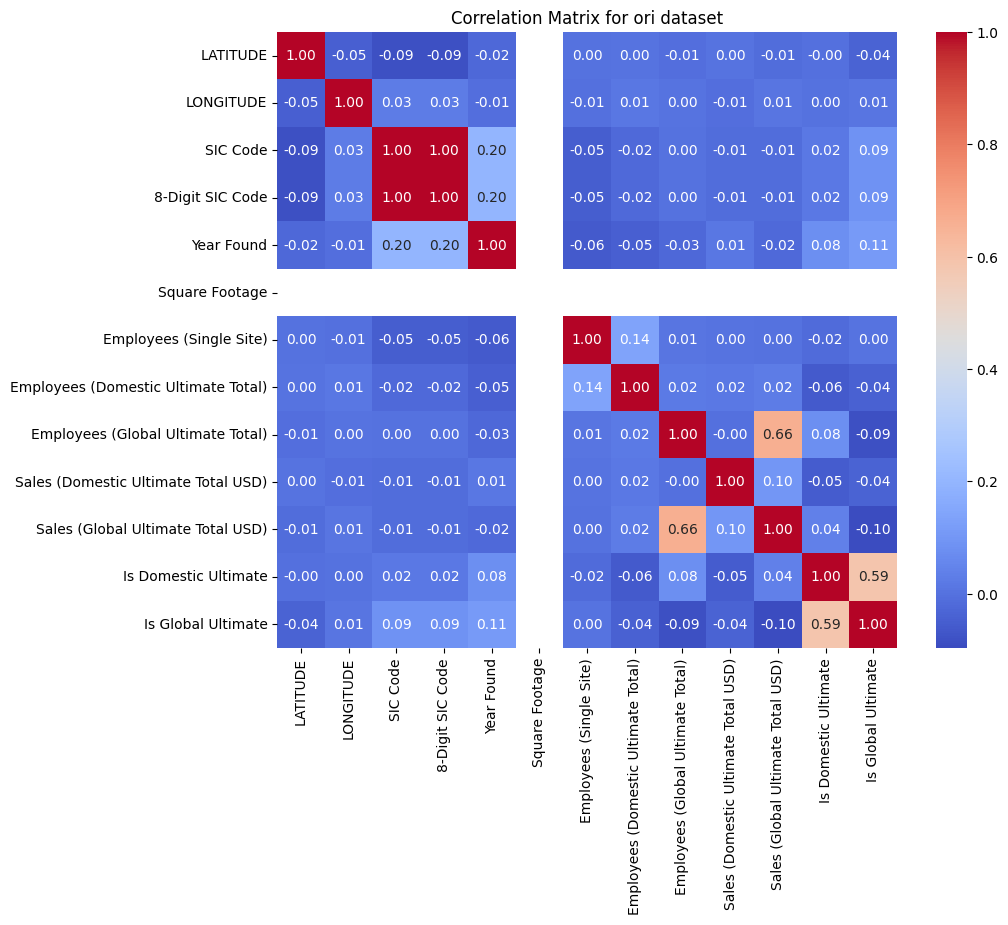

In [157]:
# Plot the correlation matrix

numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df1[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix before removing irrelevant columns')
plt.show()

numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df1[numeric_columns].corr()

#### 1.C Dropping Irrelevant Features

In [158]:
df_1c = df1.copy()
def drop_irrelevant_features(df):
    variables_to_remove = [
        'AccountID', 'Company', '8-Digit SIC Code',
        'Parent Country', 'Domestic Ultimate Company',
        '8-Digit SIC Description', 'Company Status (Active/Inactive)',
        'Fiscal Year End', 'Global Ultimate Company',
        'Global Ultimate Country','Parent Company', 'Industry', 'Square Footage'
    ]

    return df.drop(variables_to_remove, axis=1)
df_1c = drop_irrelevant_features(df_1c)
print(df_1c.isna().sum() / len(df_1c) * 100)

LATITUDE                                0.411212
LONGITUDE                               0.411212
SIC Code                                0.000000
Year Found                              1.487218
Entity Type                             0.000000
Ownership Type                          0.000000
Company Description                     0.000000
Employees (Single Site)                42.502227
Employees (Domestic Ultimate Total)     0.270715
Employees (Global Ultimate Total)       9.505860
Sales (Domestic Ultimate Total USD)     0.000000
Sales (Global Ultimate Total USD)       0.000000
Import/Export Status                   77.338770
Is Domestic Ultimate                    0.000000
Is Global Ultimate                      0.000000
dtype: float64


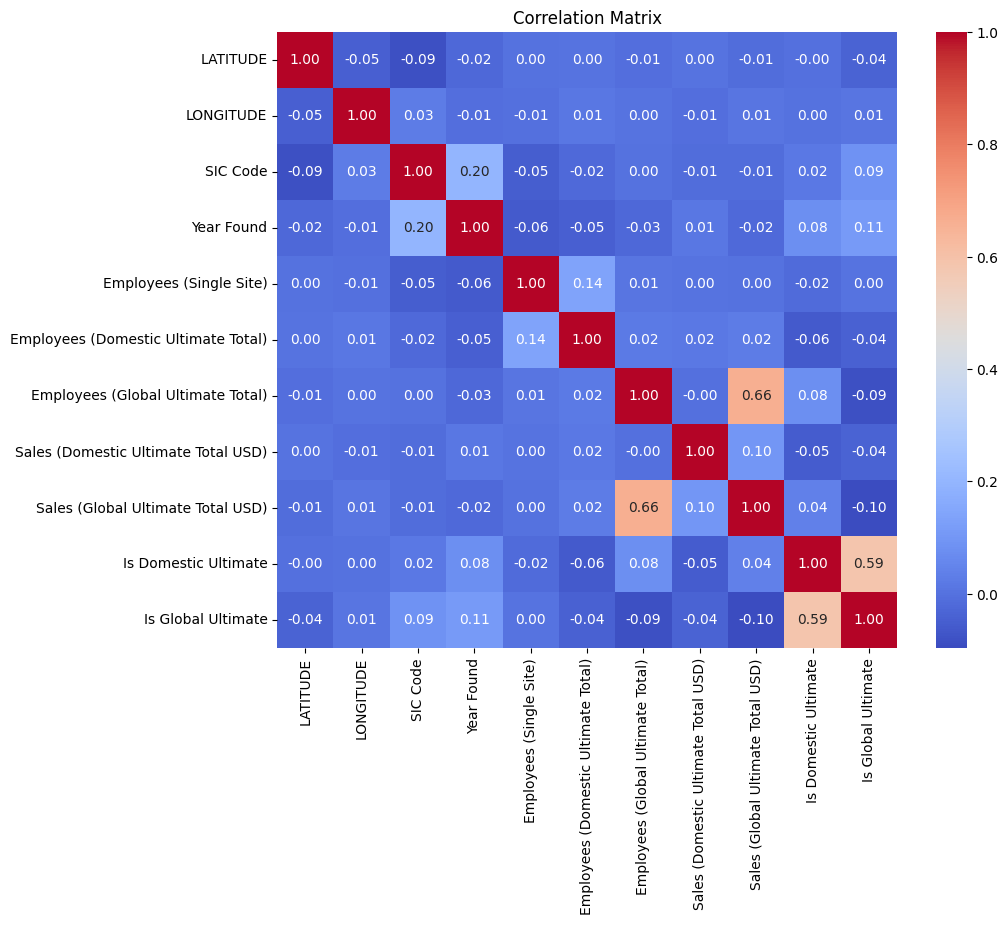

In [184]:
numeric_columns = df_1c.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_1c[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 2. One-Hot Encoding and Imputation 

#### 2.A Binning 'SIC Code' into categories and creation of new column 'Industrys'

In [160]:
# Convert SIC Code into Industrys and add a new column to the df_2a
df_2a = df_1c.copy()

def map_to_industry(sic_code):
    industry_mapping = {
    (101, 999): 'Agriculture',
    (1002, 1499): 'Mining',
    (1500, 1799): 'Construction',
    (2000, 3999): 'Manufacturing',
    (4000, 4999): 'Transportation',
    (5000, 5199): 'Wholesales',
    (5200, 5999): 'Retail',
    (6000, 6799): 'Finance',
    (7000, 8999): 'Services',
    (9000, 9899): 'Public',
    (9900, 10000): 'Others'
    }
    for code_range, industry in industry_mapping.items():
        if code_range[0] < sic_code <= code_range[1]:
            return industry
    return 'Other'

# Create a new column 'Industrys' based on the mapping
def create_industry(df):
    df['Industrys'] = df['SIC Code'].map(map_to_industry)
    df.drop('SIC Code',axis=1)
    return df

df_2a = create_industry(df_2a)
df_2a.head(5)

LATITUDE   LONGITUDE  SIC Code  Year Found Entity Type Ownership Type  \
0  1.285495  103.843852    7361.0      2020.0  Subsidiary        Private   
1  1.291294  103.827476    4449.0      2015.0  Subsidiary        Private   
2  1.300144  103.857517    6719.0      1993.0  Subsidiary        Private   
3  1.300785  103.791263    6719.0      2006.0  Subsidiary        Private   
4  1.298759  103.859430    6719.0      2006.0      Parent        Private   

                                 Company Description  Employees (Single Site)  \
0  Frank Consulting Services Private Limited is p...                     15.0   
1  New Desert Orchid Shipping Pte. Ltd. is primar...                     39.0   
2  2Mbao Biocellbank Pte. Ltd. is primarily engag...                      4.0   
3  Newbloom Pte. Ltd. is primarily engaged in hol...                     10.0   
4  Asia Green Capital Pte. Ltd. is primarily enga...                      NaN   

   Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  \
0                                 25.0                                NaN   
1                                100.0                              100.0   
2                                  4.0                                4.0   
3                                100.0                              100.0   
4                                  4.0                                4.0   

   Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  \
0                         2.209224e+06                       4.637871e+06   
1                         7.093536e+09                       7.093536e+09   
2                         1.026308e+06                       1.026308e+06   
3                         7.339898e+10                       7.339898e+10   
4                         4.322130e+05                       4.322130e+05   

  Import/Export Status  Is Domestic Ultimate  Is Global Ultimate  \
0                  NaN                   0.0                 0.0   
1                  NaN                   0.0                 0.0   
2                  NaN                   1.0                 0.0   
3                  NaN                   0.0                 0.0   
4              Exports                   1.0                 1.0   

        Industrys  
0        Services  
1  Transportation  
2         Finance  
3         Finance  
4         Finance

##### 2.A.1 Graph Sales (Domestic Ultimate Total USD) by Industrys

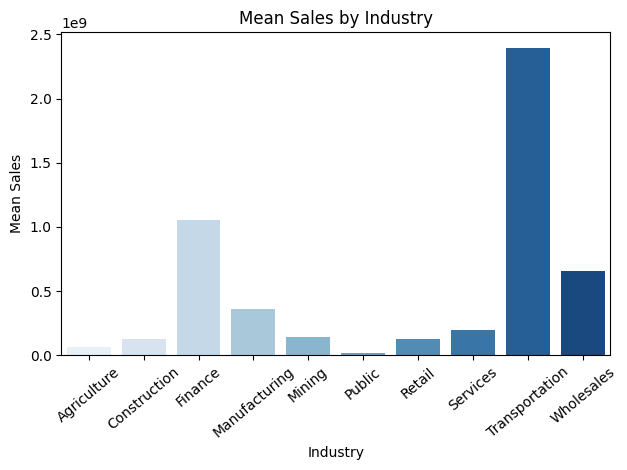

In [161]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot Mean Sales (Domestic Ultimate Total USD) vs Industrys
mean_sales = df_2a.groupby('Industrys')['Sales (Domestic Ultimate Total USD)'].mean().reset_index()
sns.barplot(x='Industrys', y='Sales (Domestic Ultimate Total USD)', data=mean_sales, palette='Blues')
plt.xticks(rotation = 40)
plt.xlabel('Industry')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Industry')
plt.tight_layout()

#### 2.B Imputation of Import/Export

##### 2.B.1 Imputation of Import/Export based on Company Description

In [162]:
df_2b = df_2a.copy()

def impute_and_evaluate_import_export_status(df, text_column, target_column):
    # Initialize a label encoder
    import_label_encoder = LabelEncoder()

    # Encode the non-missing values of the target column
    non_missing_mask = df[target_column].notna()
    encoded_labels = import_label_encoder.fit_transform(df.loc[non_missing_mask, target_column])

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        df.loc[non_missing_mask, [text_column]], 
        encoded_labels, 
        test_size=0.2, 
        random_state=42
    )
    
    # Text preprocessing and vectorization pipeline
    text_preprocessing_pipeline = Pipeline(steps=[
        ('tfidf', TfidfVectorizer(stop_words='english'))
    ])
    
    # Full preprocessing pipeline (could include other transformers if needed)
    preprocessor = ColumnTransformer(
        transformers=[
            ('text_preprocessing', text_preprocessing_pipeline, text_column),
        ]
    )
    
    # Model pipeline
    model_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predict on the test set and evaluate the accuracy
    y_pred = model_pipeline.predict(X_test)
    y_pred_labels = import_label_encoder.inverse_transform(y_pred)
    
    # Post-processing step to assign 'neither' category
    y_pred_proba = model_pipeline.predict_proba(X_test)
    prob_threshold = 0.8  # Define a threshold for the maximum probability to assign 'neither'
    y_pred_post_processed = [label if max(proba) >= prob_threshold else 'Neither' for label, proba in zip(y_pred_labels, y_pred_proba)]
    
    # Evaluate the accuracy after post-processing
    y_test_labels = import_label_encoder.inverse_transform(y_test)
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    print(f"Accuracy on the test set with post-processing: {accuracy * 100:.2f}%")
    print(classification_report(y_test_labels, y_pred_post_processed, zero_division=1))

    # Impute missing values with post-processing
    missing_mask = df[target_column].isna()
    if missing_mask.any():
        predictions_for_missing = model_pipeline.predict(df.loc[missing_mask, [text_column]])
        probas_for_missing = model_pipeline.predict_proba(df.loc[missing_mask, [text_column]])
        
        imputed_values = [import_label_encoder.classes_[np.argmax(p)] if max(p) >= prob_threshold else 'Neither' for p in probas_for_missing]
        df.loc[missing_mask, target_column] = imputed_values
    
    # Return the dataframe with imputed values and the accuracy
    return df, accuracy, model_pipeline, import_label_encoder



#'Company Description' is the text column, and 'Import/Export Status' is the target column
before_counts = df_2b['Import/Export Status'].value_counts(dropna=False)
print("Counts before imputation:")
print(before_counts)

df_2b, model_accuracy, import_export_imputation_model, import_label_encoder = impute_and_evaluate_import_export_status(df_2b, 'Company Description', 'Import/Export Status')
print(f"The model's accuracy is {model_accuracy * 100:.2f}%")
print(model_accuracy)

after_counts = df_2b['Import/Export Status'].value_counts(dropna=False)
print("\nCounts after imputation:")
print(after_counts)

## Function for pre-processsing once model is trained
def impute_import_export_status(df, model, text_column, target_column, label_encoder, prob_threshold=0.8):
    # Check for missing values
    before_counts = df['Import/Export Status'].value_counts(dropna=False)
    print("Counts before imputation:")
    print(before_counts)

    missing_mask = df[target_column].isna()
    if missing_mask.any():
        # Predict probabilities
        probas = model.predict_proba(df.loc[missing_mask, [text_column]])
        # Predict labels
        predictions = [label_encoder.classes_[np.argmax(p)] if max(p) >= prob_threshold else 'Neither' for p in probas]
        # Impute values
        df.loc[missing_mask, target_column] = predictions
    after_counts = df['Import/Export Status'].value_counts(dropna=False)
    print("\nCounts after imputation:")
    print(after_counts)
    return df

Counts before imputation:
Import/Export Status
NaN                       22569
Both Imports & Exports     4254
Exports                    1681
Imports                     678
Name: count, dtype: int64
Accuracy on the test set with post-processing: 68.86%
                        precision    recall  f1-score   support

Both Imports & Exports       0.83      0.62      0.71       844
               Exports       0.69      0.23      0.34       342
               Imports       0.38      0.02      0.04       137
               Neither       0.00      1.00      0.00         0

              accuracy                           0.45      1323
             macro avg       0.47      0.47      0.27      1323
          weighted avg       0.74      0.45      0.54      1323

The model's accuracy is 68.86%
0.6885865457294029

Counts after imputation:
Import/Export Status
Neither                   16457
Both Imports & Exports     7377
Exports                    4511
Imports                     837
Name:

#### 2.C Imputation of Missing Values for Employees (Domestic Ultimate Total)

##### 2.C.1 Exploring Relationship between Employees (Domestic Ultimate Total) and Employees (Single Site)

count    29103.000000
mean       139.764182
std       1118.939249
min          1.000000
25%          4.000000
50%         16.000000
75%         60.000000
max      80000.000000
Name: Employees (Domestic Ultimate Total), dtype: float64
Axes(0.125,0.11;0.775x0.77)
                                     Employees (Domestic Ultimate Total)  \
Employees (Domestic Ultimate Total)                             1.000000   
Employees (Single Site)                                         0.139117   

                                     Employees (Single Site)  
Employees (Domestic Ultimate Total)                 0.139117  
Employees (Single Site)                             1.000000  
                                     Employees (Domestic Ultimate Total)  \
Employees (Domestic Ultimate Total)                             1.000000   
Sales (Domestic Ultimate Total USD)                             0.016907   

                                     Sales (Domestic Ultimate Total USD)  
Employees (Domes

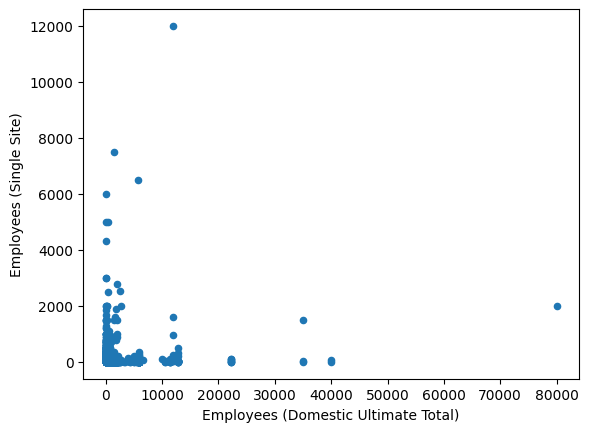

In [163]:
print(df_2b['Employees (Domestic Ultimate Total)'].describe()) #mean = 139.764182

print(df_2b.plot.scatter(x = 'Employees (Domestic Ultimate Total)', y = 'Employees (Single Site)'))

print(df_2b[['Employees (Domestic Ultimate Total)', 'Employees (Single Site)']].corr())
print(df_2b[['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)']].corr())

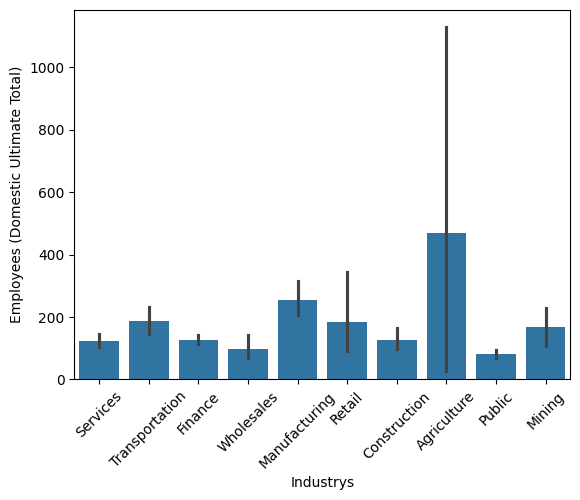

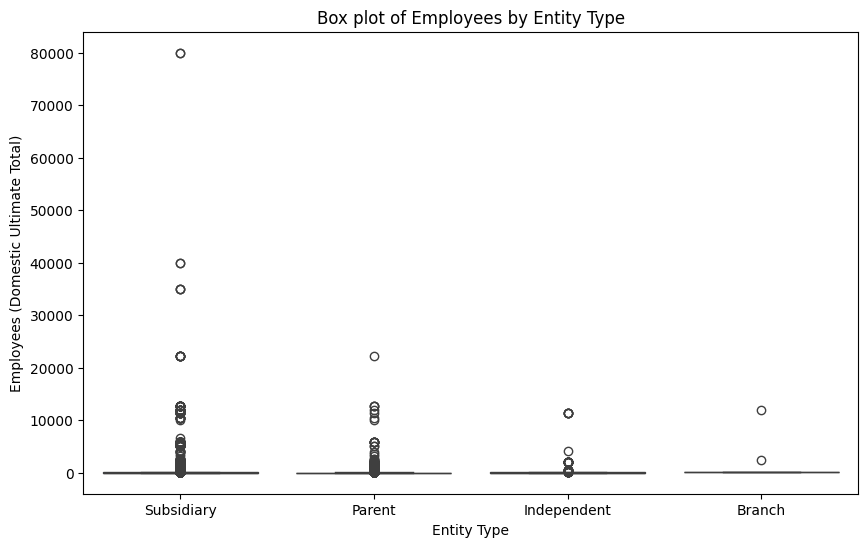

In [164]:
# Grouped Analysis
sns.barplot(x='Industrys', y='Employees (Domestic Ultimate Total)', data=df_2b)
plt.xticks(rotation=45)
plt.show()

# Box plot for 'Employees' by 'Entity Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Entity Type', y='Employees (Domestic Ultimate Total)', data=df_2b)
plt.title('Box plot of Employees by Entity Type')
plt.show()

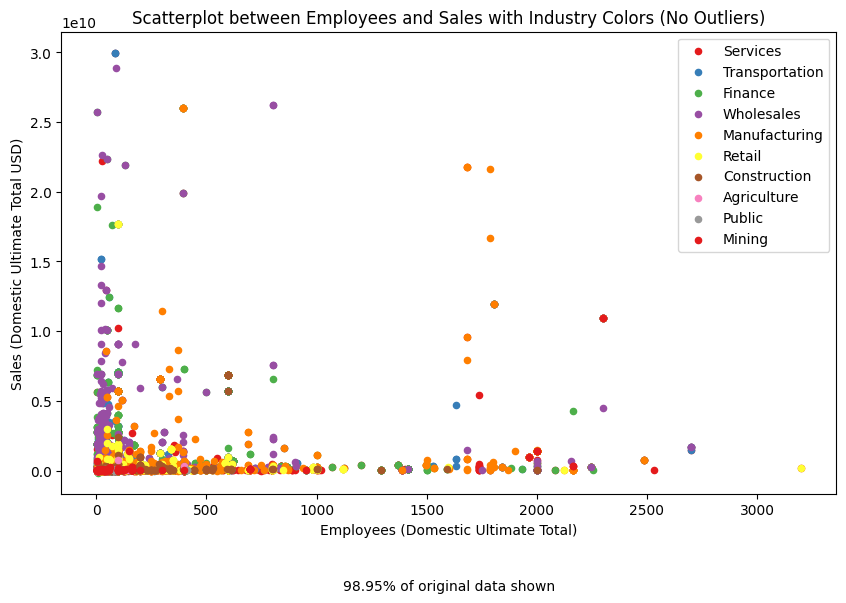

In [165]:
#ScatterPlot for 'Employees' vs 'Sales (Domestic Ultimate Total USD) removed outliers 3 standard deviation away'

# Get unique industries
unique_industries = df_2b['Industrys'].unique()

# Create a dictionary to map each unique industry to a unique color
industry_colors = dict(zip(unique_industries, sns.color_palette('Set1', n_colors=len(unique_industries))))

# Drop rows with missing values in the selected columns
df_filtered = df_2b.dropna(subset=['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)'])

# Z-score normalization to identify outliers
z_scores = zscore(df_filtered[['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)']])
threshold = 3
filtered_indices = (z_scores < threshold).all(axis=1)
df_no_outliers = df_filtered[filtered_indices]

# Plot the scatterplot without outliers with smaller circles
plt.figure(figsize=(10, 6))
for industry in unique_industries:
    subset = df_no_outliers[df_no_outliers['Industrys'] == industry]
    if not subset.empty:  # Check if there is data for the industry
        color = industry_colors[industry]
        plt.scatter(subset['Employees (Domestic Ultimate Total)'], subset['Sales (Domestic Ultimate Total USD)'], label=industry, color=color, s=20)

# Calculate the percentage of original data shown
percentage_shown = (len(df_no_outliers) / len(df_filtered)) * 100

# Annotate the plot with the percentage at the bottom
plt.text(0.5, -0.2, f'{percentage_shown:.2f}% of original data shown', transform=plt.gca().transAxes, ha='center', va='center')

plt.xlabel('Employees (Domestic Ultimate Total)')
plt.ylabel('Sales (Domestic Ultimate Total USD)')
plt.title('Scatterplot between Employees and Sales with Industry Colors (No Outliers)')
plt.legend()

plt.show()


##### 2.C.2 Imputation of Missing Values from OLS Regression

In [166]:
df_2c = df_2b.copy()

## Run OLS on Employees (Domestic Ultimate Total) using Emplyees (Single Site)
employees_imputation_model = sm.ols(formula="Q('Employees (Domestic Ultimate Total)') ~ Q('Employees (Single Site)')", data=df_2c).fit()
print(employees_imputation_model.summary())  # Check if results are significant

# Identify indices with missing values in 'Employees (Domestic Ultimate Total)' but not in 'Employees (Single Site)'
missing_indices = df_2c[df_2c['Employees (Domestic Ultimate Total)'].isnull() & df_2c['Employees (Single Site)'].notnull()].index

# Predict missing values using the fitted model
predicted_values = employees_imputation_model.predict(df_2c.loc[missing_indices, ['Employees (Single Site)']])

# Replace missing values with predicted values
df_2c.loc[missing_indices, 'Employees (Domestic Ultimate Total)'] = predicted_values

# Only five rows left where we cannot replace with Employees (Single Site)
remaining_missing = df_2c.loc[df_2c['Employees (Domestic Ultimate Total)'].isna()][['Employees (Single Site)', 'Employees (Domestic Ultimate Total)']]
print(remaining_missing)
df_2c = df_2c[df_2c['Employees (Domestic Ultimate Total)'].notna()]
len(df_2c['Employees (Domestic Ultimate Total)'])


## Function for pre-processsing once model is trained
def impute_employees(df, model):
    missing_indices = df[df['Employees (Domestic Ultimate Total)'].isnull() & df['Employees (Single Site)'].notnull()].index
    if missing_indices.any():
        # Predict missing values
        predicted_values = model.predict(df.loc[missing_indices, ['Employees (Single Site)']])
        # Impute values
        df.loc[missing_indices, 'Employees (Domestic Ultimate Total)'] = predicted_values
    return df


                                       OLS Regression Results                                       
Dep. Variable:     Q('Employees (Domestic Ultimate Total)')   R-squared:                       0.019
Model:                                                  OLS   Adj. R-squared:                  0.019
Method:                                       Least Squares   F-statistic:                     329.6
Date:                                      Mon, 29 Jan 2024   Prob (F-statistic):           5.79e-73
Time:                                              22:14:48   Log-Likelihood:            -1.4246e+05
No. Observations:                                     16705   AIC:                         2.849e+05
Df Residuals:                                         16703   BIC:                         2.849e+05
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

#### 2.D Imputation of Missing Values for 'Year Found'

In [167]:
df_2d = df_2c.copy()
print(df_2d['Year Found'].describe())

## Replace missing values in Year Found by the median 2008 
df_2d['Year Found'] = df_2d['Year Found'].fillna(2008)

print(df_2d[['Year Found', 'Sales (Domestic Ultimate Total USD)']].corr())

result = sm.ols(formula="df_2d['Sales (Domestic Ultimate Total USD)'] ~ df_2d['Year Found']", data=df_2d).fit()
print(result.summary()) #Significant 

#len(df.loc[df['Year Found']==2008]) #1116
#len(df_2d.loc[df_2d['Year Found']==2008]) #1550

#TODO: Add step to hidden model pre-processing

count    28743.000000
mean      2004.507706
std         13.462817
min       1819.000000
25%       1997.000000
50%       2008.000000
75%       2014.000000
max       2023.000000
Name: Year Found, dtype: float64
                                     Year Found  \
Year Found                             1.000000   
Sales (Domestic Ultimate Total USD)    0.014328   

                                     Sales (Domestic Ultimate Total USD)  
Year Found                                                      0.014328  
Sales (Domestic Ultimate Total USD)                             1.000000  
                                         OLS Regression Results                                         
Dep. Variable:     df_2d['Sales (Domestic Ultimate Total USD)']   R-squared:                       0.000
Model:                                                      OLS   Adj. R-squared:                  0.000
Method:                                           Least Squares   F-statistic:                   

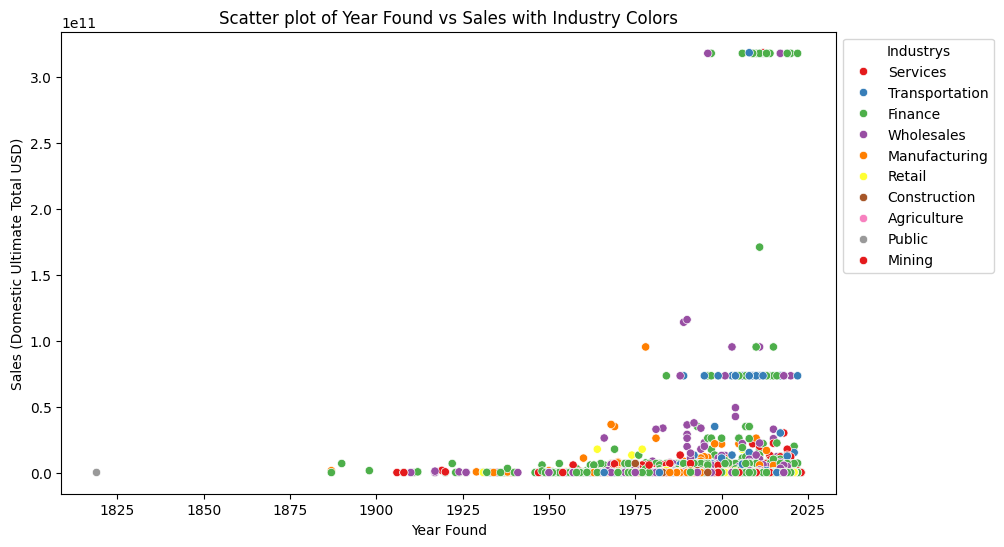

In [168]:

# Assuming df is your DataFrame with 'Year Found', 'Sales', and 'Industrys' columns

# Create a dictionary to map each unique industry to a unique color
industry_palette = sns.color_palette('Set1', n_colors=len(df_2d['Industrys'].unique()))
industry_colors = dict(zip(df_2d['Industrys'].unique(), industry_palette))

# Scatter plot for 'Year Found' vs 'Sales' with colors based on industries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', hue='Industrys', palette=industry_colors, data=df_2d)
plt.title('Scatter plot of Year Found vs Sales with Industry Colors')
plt.legend(title='Industrys', bbox_to_anchor=(1, 1))
plt.show()


### Time Series Analysis

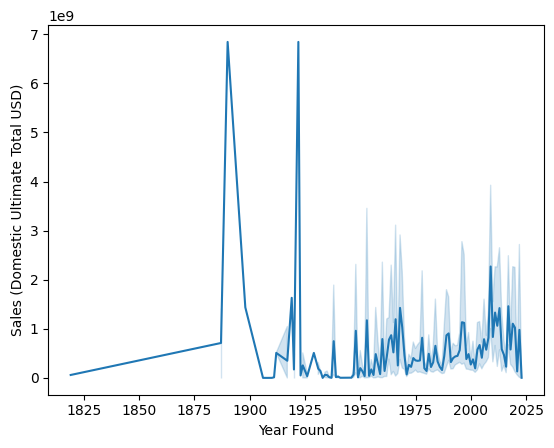

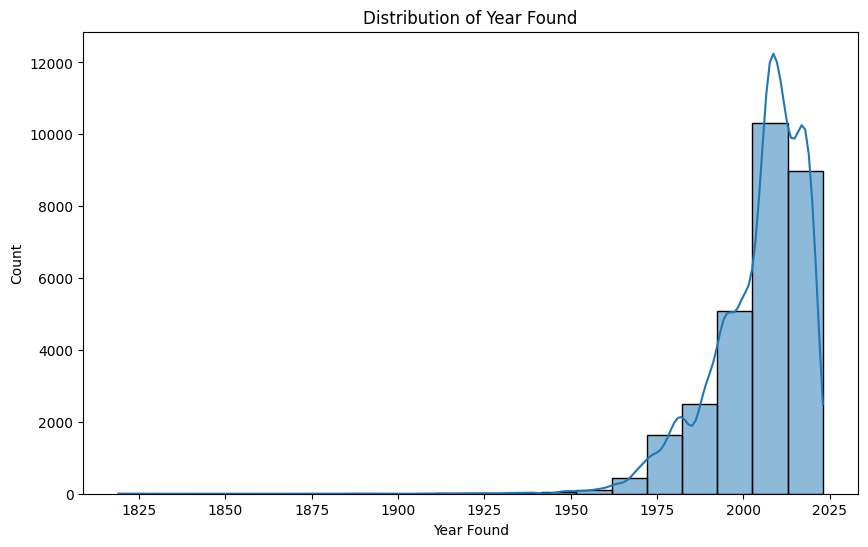

In [169]:
sns.lineplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', data=df_2d)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_2d['Year Found'], bins=20, kde=True)
plt.title('Distribution of Year Found')
plt.show()

#### 2.E One-Hot Encoding for Entity Type, Ownership Type, and Industrys


In [170]:
df_2e = df_2d.copy()
print(df_2e)
# df_2e = df_2e.drop(['Sales (Domestic Ultimate Total USD)'],axis=1)

def one_hot_encoding(df):
    df=pd.get_dummies(df, columns=['Industrys'],drop_first=True)
    df=pd.get_dummies(df, columns=['Entity Type'],drop_first=True)
    df=pd.get_dummies(df, columns=['Ownership Type'],drop_first=True)
    df=pd.get_dummies(df, columns=['Import/Export Status'],drop_first=True)
    return df

df_2e = one_hot_encoding(df_2e)

print(df_2e)

       LATITUDE   LONGITUDE  SIC Code  Year Found  Entity Type Ownership Type  \
0      1.285495  103.843852    7361.0      2020.0   Subsidiary        Private   
1      1.291294  103.827476    4449.0      2015.0   Subsidiary        Private   
2      1.300144  103.857517    6719.0      1993.0   Subsidiary        Private   
3      1.300785  103.791263    6719.0      2006.0   Subsidiary        Private   
4      1.298759  103.859430    6719.0      2006.0       Parent        Private   
...         ...         ...       ...         ...          ...            ...   
29177  1.355309  103.887857    6719.0      2009.0   Subsidiary        Private   
29178  1.319605  103.898298    6719.0      2008.0  Independent        Private   
29179  1.316363  103.924303    6726.0      1991.0   Subsidiary         Public   
29180  1.295595  103.858968    6719.0      2018.0   Subsidiary        Private   
29181  1.311769  103.801710    5099.0      2018.0   Subsidiary        Private   

                           

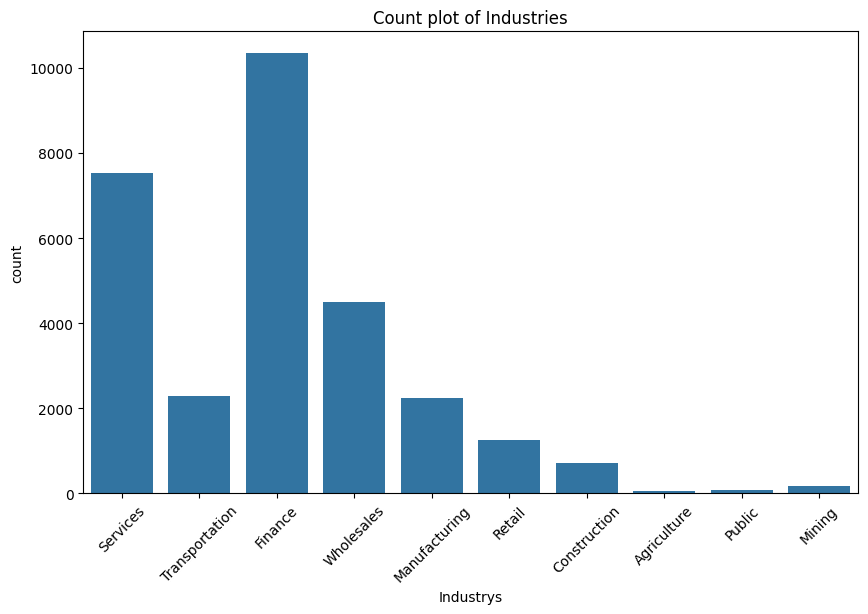

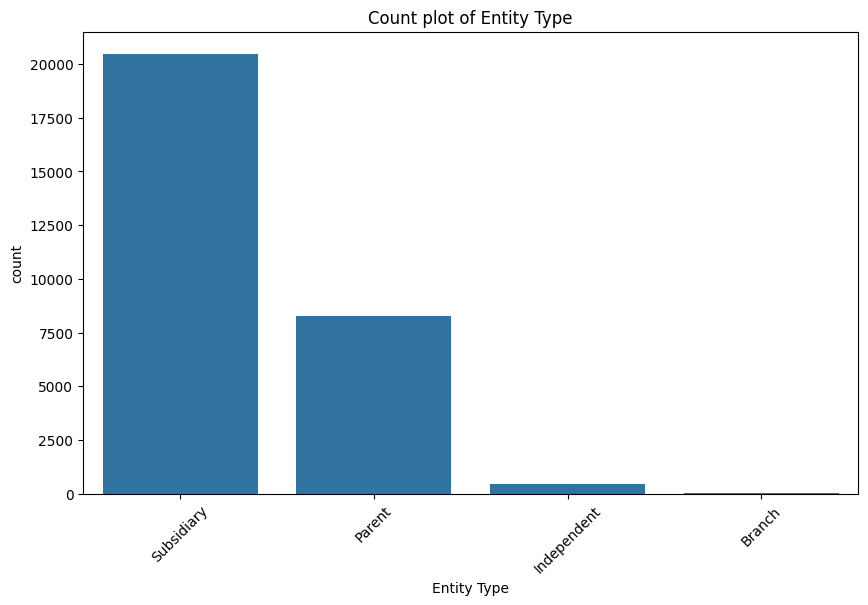

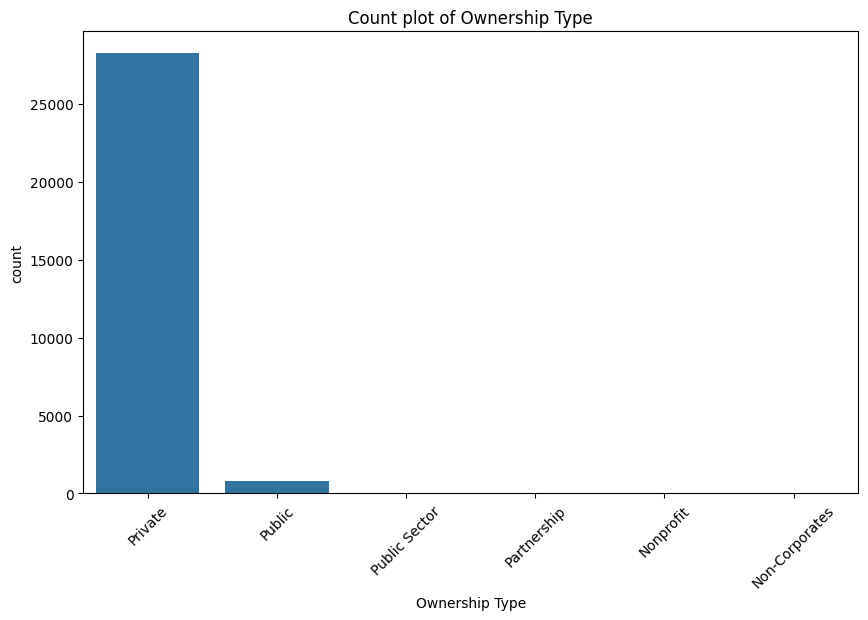

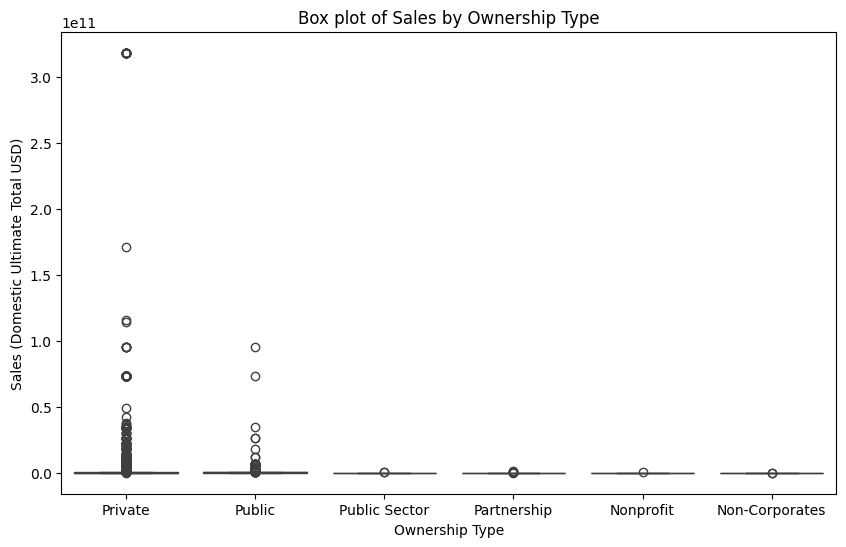

In [171]:
# Count plot for 'Industrys'
plt.figure(figsize=(10, 6))
sns.countplot(x='Industrys', data=df_2d)
plt.title('Count plot of Industries')
plt.xticks(rotation=45)
plt.show()

# Count plot for 'Entity Type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Entity Type', data=df_2d)
plt.title('Count plot of Entity Type')
plt.xticks(rotation=45)
plt.show()

# Count plot for 'Ownership Type'
plt.figure(figsize=(10, 6))
sns.countplot(x='Ownership Type', data=df_2d)
plt.title('Count plot of Ownership Type')
plt.xticks(rotation=45)
plt.show()

# Box plot for 'Sales' by 'Ownership Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ownership Type', y='Sales (Domestic Ultimate Total USD)', data=df_2d)
plt.title('Box plot of Sales by Ownership Type')
plt.show()

#### 2.F Final Cleaning of Data

In [172]:
df_2f = df_2e.copy()

def final_cleaning(df):
    variables_to_remove = [
        'Company Description'
    ]
    df = df.drop(variables_to_remove, axis=1)
    # print("Before Dropping:" + "\n" + str(df.isna().sum() / len(df) * 100))
    df = df.dropna()
    # print("After Dropping:" + "\n" + str(df.isna().sum() / len(df) * 100))
    # print("Number of data points:" + str(len(df)))
    return df

df_2f = final_cleaning(df_2f)
print(df_2f.columns)
print(df_2f.shape)
df_2f.head(5)

Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Year Found',
       'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Industrys_Construction', 'Industrys_Finance',
       'Industrys_Manufacturing', 'Industrys_Mining', 'Industrys_Public',
       'Industrys_Retail', 'Industrys_Services', 'Industrys_Transportation',
       'Industrys_Wholesales', 'Entity Type_Independent', 'Entity Type_Parent',
       'Entity Type_Subsidiary', 'Ownership Type_Nonprofit',
       'Ownership Type_Partnership', 'Ownership Type_Private',
       'Ownership Type_Public', 'Ownership Type_Public Sector',
       'Import/Export Status_Exports', 'Import/Export Status_Imports',
       'Import/Export Status_Neither'],
      dtype='object')
(14605, 31)


LATITUDE   LONGITUDE  SIC Code  Year Found  Employees (Single Site)  \
1  1.291294  103.827476    4449.0      2015.0                     39.0   
2  1.300144  103.857517    6719.0      1993.0                      4.0   
3  1.300785  103.791263    6719.0      2006.0                     10.0   
5  1.444773  103.812740    4959.0      1986.0                    300.0   
7  1.282887  103.850849    6719.0      2010.0                     10.0   

   Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  \
1                                100.0                              100.0   
2                                  4.0                                4.0   
3                                100.0                              100.0   
5                                  4.0                                4.0   
7                                  4.0                                4.0   

   Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  \
1                         7.093536e+09                       7.093536e+09   
2                         1.026308e+06                       1.026308e+06   
3                         7.339898e+10                       7.339898e+10   
5                         1.026308e+06                       1.026308e+06   
7                         1.026308e+06                       1.026308e+06   

   Is Domestic Ultimate  ...  Entity Type_Parent  Entity Type_Subsidiary  \
1                   0.0  ...               False                    True   
2                   1.0  ...               False                    True   
3                   0.0  ...               False                    True   
5                   0.0  ...               False                    True   
7                   0.0  ...               False                    True   

   Ownership Type_Nonprofit  Ownership Type_Partnership  \
1                     False                       False   
2                     False                       False   
3                     False                       False   
5                     False                       False   
7                     False                       False   

   Ownership Type_Private  Ownership Type_Public  \
1                    True                  False   
2                    True                  False   
3                    True                  False   
5                    True                  False   
7                    True                  False   

   Ownership Type_Public Sector  Import/Export Status_Exports  \
1                         False                         False   
2                         False                         False   
3                         False                         False   
5                         False                         False   
7                         False                         False   

   Import/Export Status_Imports  Import/Export Status_Neither  
1                         False                          True  
2                         False                          True  
3                         False                          True  
5                         False                          True  
7                         False                          True  

[5 rows x 31 columns]

## 3. Model Training

In [173]:
df_copy = df.copy()
print(df_copy)
# df_copy = df_copy.drop(['Sales (Domestic Ultimate Total USD)'],axis=1)

#df=df.join(pd.get_dummies(df.Industrys))
df_copy=pd.get_dummies(df_copy, columns=['Industrys'],drop_first=True)
df_copy=pd.get_dummies(df_copy, columns=['Entity Type'],drop_first=True)
df_copy=pd.get_dummies(df_copy, columns=['Ownership Type'],drop_first=True)

# df_copy.columns = df_copy.columns.str.replace('Industrys_', '')
# df_copy.columns = df_copy.columns.str.replace('Entity Type_', '')
# df_copy.columns = df_copy.columns.str.replace('Ownership Type_', '')
# df_copy = df_copy.dropna()
print(df_copy)

       LATITUDE   LONGITUDE  Year Found Entity Type Ownership Type  \
1      1.291294  103.827476      2015.0  Subsidiary        Private   
2      1.300144  103.857517      1993.0  Subsidiary        Private   
3      1.300785  103.791263      2006.0  Subsidiary        Private   
5      1.444773  103.812740      1986.0  Subsidiary        Private   
7      1.282887  103.850849      2010.0  Subsidiary        Private   
...         ...         ...         ...         ...            ...   
29171  1.274915  103.799145      2020.0  Subsidiary        Private   
29175  1.292221  103.850613      2009.0  Subsidiary        Private   
29176  1.277753  103.848429      1996.0  Subsidiary        Private   
29180  1.295595  103.858968      2018.0  Subsidiary        Private   
29181  1.311769  103.801710      2018.0  Subsidiary        Private   

       Employees (Single Site)  Employees (Domestic Ultimate Total)  \
1                         39.0                                100.0   
2                

FEATURE SELECTION (STEPWISE)

In [174]:
df_3 = df_2f.copy()

# Defining predictors and target variable
y = df_3['Sales (Domestic Ultimate Total USD)']
X = df_3.drop('Sales (Domestic Ultimate Total USD)', axis = 1)


print(X)
# Splitting the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


       LATITUDE   LONGITUDE  SIC Code  Year Found  Employees (Single Site)  \
1      1.291294  103.827476    4449.0      2015.0                     39.0   
2      1.300144  103.857517    6719.0      1993.0                      4.0   
3      1.300785  103.791263    6719.0      2006.0                     10.0   
5      1.444773  103.812740    4959.0      1986.0                    300.0   
7      1.282887  103.850849    6719.0      2010.0                     10.0   
...         ...         ...       ...         ...                      ...   
29171  1.274915  103.799145    6719.0      2020.0                     10.0   
29175  1.292221  103.850613    7389.0      2009.0                     25.0   
29176  1.277753  103.848429    1731.0      1996.0                    100.0   
29180  1.295595  103.858968    6719.0      2018.0                     10.0   
29181  1.311769  103.801710    5099.0      2018.0                     11.0   

       Employees (Domestic Ultimate Total)  Employees (Global U

#### 3.A Linear Regression Model

In [175]:
import sklearn


lr = LinearRegression()
# Fit the model with selected features
lr.fit(X_train, y_train)

# Make predictions using your trained model
y_pred = lr.predict(X_test)

# Calculate metrics
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1659747533.8952503
Mean Squared Error (MSE): 4.5986362370063e+19
Root Mean Squared Error (RMSE): 6781324529.180343
R-squared (R2): 0.037226288349268


#### 3.B Gradient Boosting

In [176]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []
    
# Use k-fold cross-validation with 10 folds
model_10 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [ 0.26560934  0.2963767   0.13566476  0.5221853   0.36860544  0.27329639
  0.66251876  0.64409115  0.32919778 -0.01669885]
Mean R-squared score: 0.3480846761040147
Standard Deviation of R-squared scores: 0.20269087142321998
Test R-squared score: 0.7273425978697006


#### 3.C XG-Boost


In [177]:
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Use k-fold cross-validation with 10 folds
model_10 = xgb.XGBRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [ 0.30102468  0.18457286  0.27650854  0.36584246 -0.12277137 -0.29205982
  0.77374134  0.64279929  0.12779372  0.31062184]
Mean R-squared score: 0.2568073534621541
Standard Deviation of R-squared scores: 0.30008931964506647
Test R-squared score: 0.6548119846799585


#### 3.D Catboost

In [178]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from catboost import CatBoostRegressor

# Initialize the CatBoost Regressor
model = CatBoostRegressor(random_state=42)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Use k-fold cross-validation with 10 folds
model_10 = CatBoostRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)


Learning rate set to 0.058138
0:	learn: 11534432046.7225838	total: 7.82ms	remaining: 7.81s
1:	learn: 11423693266.6752014	total: 10.1ms	remaining: 5.02s
2:	learn: 11312881745.1109028	total: 11.9ms	remaining: 3.94s
3:	learn: 11089984988.0717659	total: 13.8ms	remaining: 3.44s
4:	learn: 11013013521.1175938	total: 15.6ms	remaining: 3.11s
5:	learn: 10909179313.0442677	total: 17.1ms	remaining: 2.84s
6:	learn: 10663364333.0099754	total: 18.7ms	remaining: 2.65s
7:	learn: 10606676839.4709587	total: 20.6ms	remaining: 2.55s
8:	learn: 10532061448.0379925	total: 22.1ms	remaining: 2.43s
9:	learn: 10479629419.4477921	total: 23.8ms	remaining: 2.35s
10:	learn: 10402091773.9680786	total: 25.3ms	remaining: 2.27s
11:	learn: 10347527579.9374542	total: 26.7ms	remaining: 2.2s
12:	learn: 10298342488.0368862	total: 28.2ms	remaining: 2.14s
13:	learn: 10261365358.9993134	total: 29.7ms	remaining: 2.09s
14:	learn: 10146945722.7091045	total: 31.4ms	remaining: 2.06s
15:	learn: 10101115628.5545845	total: 33.3ms	remain

#### 3.E PCA


In [179]:
from sklearn.decomposition import PCA

                                          PC0       PC1       PC2       PC3  \
LATITUDE                            -0.017392  0.002102 -0.001987  0.171039   
LONGITUDE                            0.014148  0.005377  0.009405  0.006756   
Year Found                          -0.048730 -0.055590  0.005258  0.098579   
Employees (Single Site)              0.021994  0.024300  0.008014  0.035769   
Employees (Domestic Ultimate Total)  0.035350 -0.014149 -0.013087  0.025829   
Employees (Global Ultimate Total)    0.015892 -0.171159  0.615045 -0.076625   
Sales (Domestic Ultimate Total USD) -0.010484 -0.009682  0.073631 -0.044961   
Sales (Global Ultimate Total USD)    0.008038 -0.165022  0.624981 -0.100915   
Is Domestic Ultimate                 0.079676 -0.146035  0.302868 -0.045907   
Is Global Ultimate                   0.494023 -0.160497 -0.091502 -0.123820   
Industrys_Construction              -0.017517  0.007678 -0.046331  0.025020   
Industrys_Finance                    0.048063  0.084

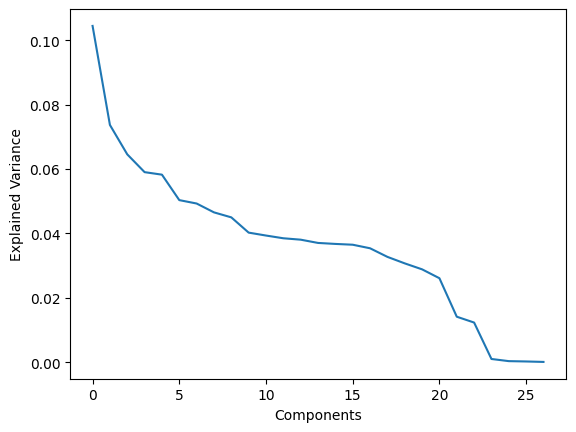

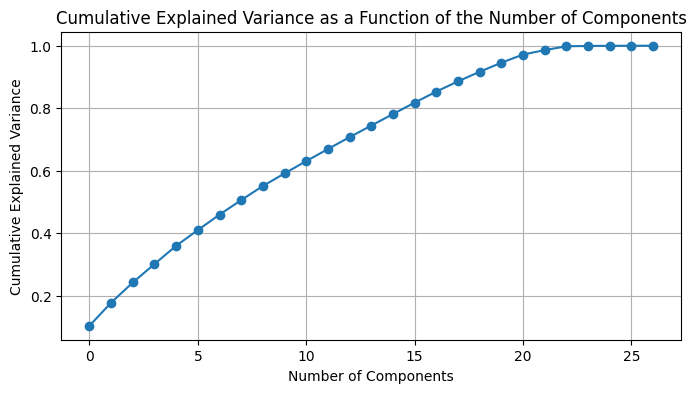

In [180]:
df_copy2 = df_3.copy()

df_normalized=(df_copy - df_copy.mean()) / df_copy.std()
pca = PCA(n_components=df_copy.shape[1])
pca.fit(df_normalized)


loadings = pd.DataFrame(pca.components_.T, columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],index=df_normalized.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

# Calculate the cumulative variance explained by each component
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.grid(True)
plt.show()

   LATITUDE   LONGITUDE  SIC Code  Year Found  Employees (Single Site)  \
1  1.291294  103.827476    4449.0      2015.0                     39.0   
2  1.300144  103.857517    6719.0      1993.0                      4.0   
3  1.300785  103.791263    6719.0      2006.0                     10.0   
5  1.444773  103.812740    4959.0      1986.0                    300.0   
7  1.282887  103.850849    6719.0      2010.0                     10.0   

   Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  \
1                                100.0                              100.0   
2                                  4.0                                4.0   
3                                100.0                              100.0   
5                                  4.0                                4.0   
7                                  4.0                                4.0   

   Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  \
1              

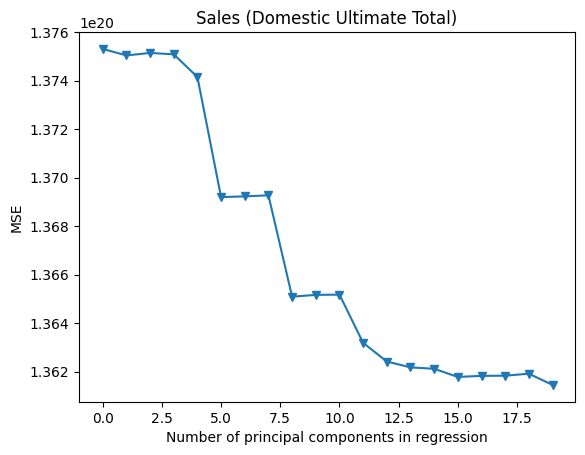

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

print(df_copy2.head())
# Assuming df_copy is your DataFrame and 'Sales (Total Domestic USD)' is your target variable
# X = df_copy2
# y = df.dropna()['Sales (Domestic Ultimate Total USD)']

# Standardize the data (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Select the number of components based on cumulative variance plot + 10-Fold cross validation 

# 10-fold CV, with shuffle
n = len(X_train_pca)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_train_pca[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sales (Domestic Ultimate Total)')
plt.xlim(xmin=-1)

# Pick 13 components 
n_components = 13
print(X_train_pca)
# Regression Model
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

# Predictions
y_pred = regressor.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [182]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    result = []
    
    # Drop Irrelevant Features
    hidden_data = drop_irrelevant_features(hidden_data)
    
    # Create Industrys column
    hidden_data = create_industry(hidden_data)
    
    # Import/Export Imputation
    hidden_data = impute_import_export_status(hidden_data, import_export_imputation_model, 'Company Description','Import/Export Status', import_label_encoder)
    
    # Employees Imputation
    hidden_data = impute_employees(hidden_data, employees_imputation_model)
    
    ## Year Imputation
    df_2d['Year Found'] = df_2d['Year Found'].fillna(2008)
    
    # One-hot encoding
    hidden_data = one_hot_encoding(hidden_data)
    
    #Final cleaning
    hidden_data = final_cleaning(hidden_data)
    
    # print(hidden_data)
    print(hidden_data.columns)
    print(hidden_data.shape)
    result = hidden_data.values.tolist()
    # print(result)
    return result

##### Cell to check testing_hidden_data function

In [183]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

Counts before imputation:
Import/Export Status
NaN                       22569
Both Imports & Exports     4254
Exports                    1681
Imports                     678
Name: count, dtype: int64

Counts after imputation:
Import/Export Status
Neither                   16457
Both Imports & Exports     7377
Exports                    4511
Imports                     837
Name: count, dtype: int64
Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Year Found',
       'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Industrys_Construction', 'Industrys_Finance',
       'Industrys_Manufacturing', 'Industrys_Mining', 'Industrys_Public',
       'Industrys_Retail', 'Industrys_Services', 'Industrys_Transportation',
       'Industrys_Wholesales', 'Entity Type_Independent', 'Entity Type_Parent',
       'Entity Type_Subsidiary', 'Ownership Type

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!